### **Introduction and Problem Statement:**
- We have a dataset named Bank Marketing Dataset(UCI machine learning).
- The problem is to predict whether a customer will accept the offer to deposit or not.

### **Data Understanding and Description:**
- Dataset has 17 features having deposit as the target feature.
- The dataset contains no null values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [ ]:
# Removing the semi-colon between the values and replacing them with commas and writing in a new file
import csv
#Read csv
with open('bank-full.csv', 'r') as file:
    lines = file.readlines()
# Write it in another csv
with open('bank.csv', 'w', newline='') as newfile:
    writer = csv.writer(newfile)
    for line in lines:
        # Remove strings and split on ;
        writer.writerow(line.strip().replace('"', '').split(';'))


In [3]:
data=pd.read_csv('bank.csv')
print(data.head()) # first five rows
print(data.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data column

In [4]:
print("Missing Values: ",data.isnull().sum()) #finding out missing values

Missing Values:  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [5]:
print(data['age'].value_counts())
print("Minimum Age :",data.age.min()) #Statistical Analysis
print("Maximum Age :",data.age.max())

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
Minimum Age : 18
Maximum Age : 95


In [6]:
data['marital'].value_counts() # number of different values

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [7]:
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [8]:
data['job'].mode() # frequent occuring value

0    blue-collar
Name: job, dtype: object

In [9]:
data['marital'].mode()

0    married
Name: marital, dtype: object

In [10]:
data.age.mode()

0    32
Name: age, dtype: int64

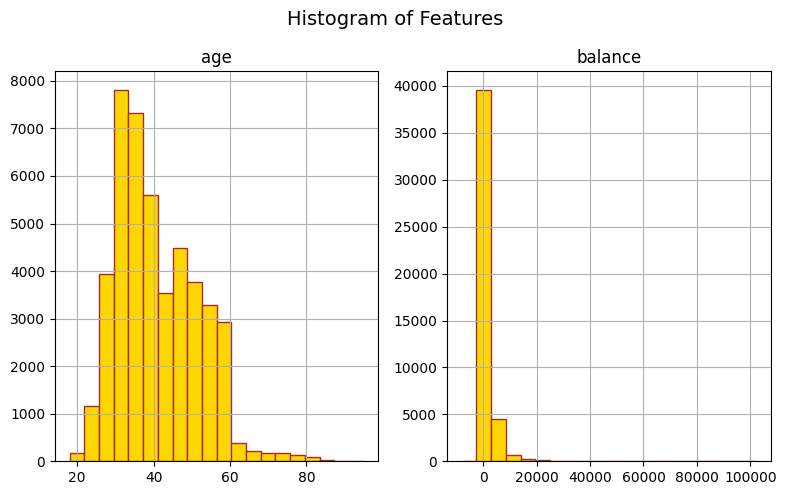

In [11]:
num_cols = ['age','balance']
data[num_cols].hist(figsize=(8,5 ), bins=20, color='gold', edgecolor='brown') # To show distribution
mp.suptitle('Histogram of Features', fontsize=14)
mp.tight_layout()
mp.show()

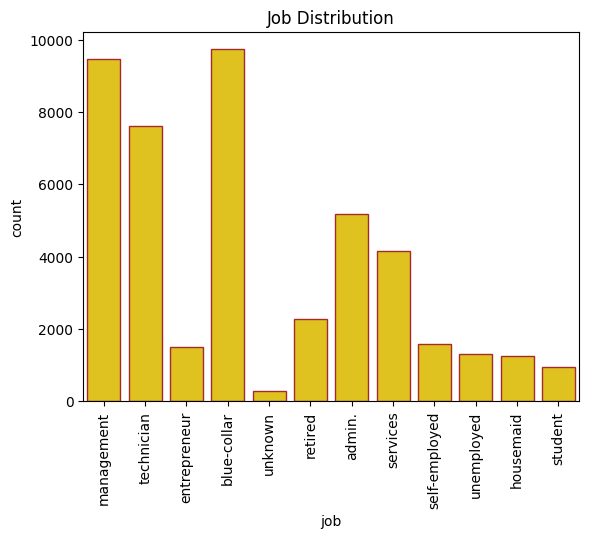

In [12]:
sns.countplot(x="job",data=data,color='gold',edgecolor="brown") # showing count of different jobs
mp.xticks(rotation=90)
mp.title('Job Distribution')
mp.show()


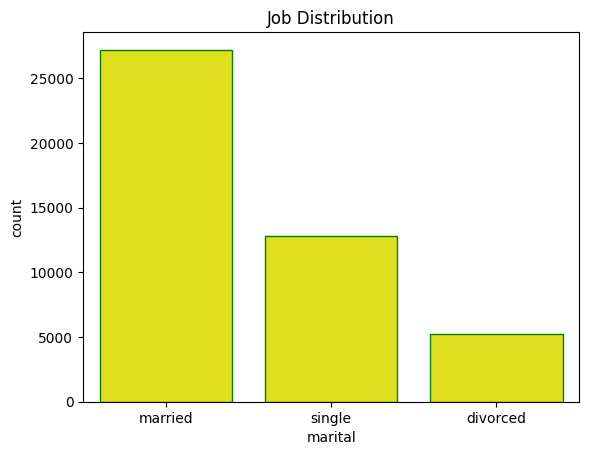

In [13]:
sns.countplot(x="marital",data=data,color='yellow',edgecolor="green") # showing how many are married, not married,divorced
mp.xticks(rotation=0)
mp.title('Job Distribution')
mp.show()


<Axes: xlabel='deposit', ylabel='duration'>

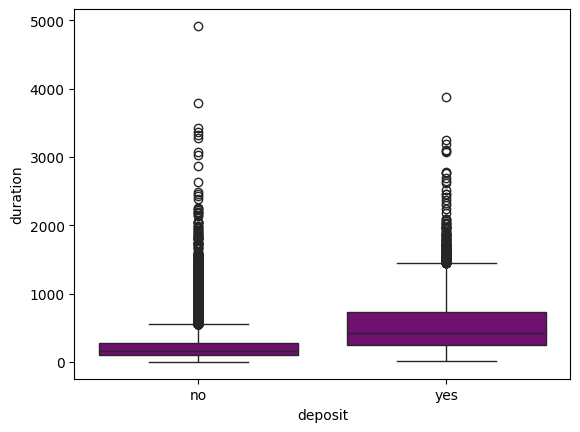

In [14]:
sns.boxplot(x='deposit', y='duration', data=data,color="purple") # boxplot for duration the highest circles are showing outliers

In [15]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [16]:
label_encoder_y = LabelEncoder()
data['deposit'] = label_encoder_y.fit_transform(data['deposit']) # encode the target column

In [17]:
X=data.drop(['deposit'],axis=1) # Drop target column 
Y=data['deposit']
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [18]:
# Encoding categorical columns
cols = ['default', 'housing', 'loan']
label_encoders = {}

for col in cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  
    label_encoders[col] = le

In [19]:
# Encoding multi valued columns using ordinal encoder
multi_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
ordinal_encoder = ce.OrdinalEncoder(cols=multi_cols)
X = ordinal_encoder.fit_transform(X)

In [20]:
# Splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,41,4,1,4,0,849,1,0,1,15,1,72,1,-1,0,1
17965,49,2,1,4,0,1415,1,0,2,30,3,269,2,-1,0,1
18299,42,7,1,2,0,3842,0,0,2,31,3,130,4,-1,0,1
10221,37,1,2,1,0,-119,1,0,1,11,2,375,11,-1,0,1
32192,56,4,1,4,0,3498,0,0,2,15,11,264,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,11,2,4,0,1059,0,0,1,18,2,2093,1,-1,0,1
44732,23,12,2,1,0,508,0,0,2,8,12,210,1,92,1,2
38158,34,2,3,1,0,1317,1,0,2,15,1,239,1,-1,0,1
860,33,6,1,2,0,165,0,0,1,7,1,111,1,-1,0,1


In [21]:
# scaling those features having larger range of values 
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']
scaler = StandardScaler() # using Standard Scaler
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [22]:
model = LogisticRegression(max_iter=2000) # As it is classification problem
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
# Evaluate the model using following metrices
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.894061705186332
Confusion Matrix:
 [[7761  191]
 [ 767  324]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.63      0.30      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.67      9043
weighted avg       0.88      0.89      0.88      9043



In [24]:
data.groupby('job')['deposit'].value_counts().unstack()

deposit,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


### **Key Insights:**
 - It can be concluded that the customers having longer call duration with the bank are more likely to accept the offer to deposit money.
 - The customer's job and income level also play a significant role in determining their likelihood of accepting the offer.
 - The calls done during specific months like may results in higher probability to accept the offer.
 - Model's accuracy is **0.894061**(89%)
 - As it is classification problem so used logistic regression.